# Task 4 - Email Spam Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df.head

<bound method NDFrame.head of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham             Will Ã_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [3]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham             Will Ã_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham             Will Ã_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
df.dtypes

v1    object
v2    object
dtype: object

In [7]:
le = LabelEncoder()
df["v1"] = le.fit_transform(df["v1"])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df = df.drop_duplicates(keep="first")

df.duplicated().sum()

0

In [12]:
df["v1"].value_counts() #here 1 denotes spam

0    4516
1     653
Name: v1, dtype: int64

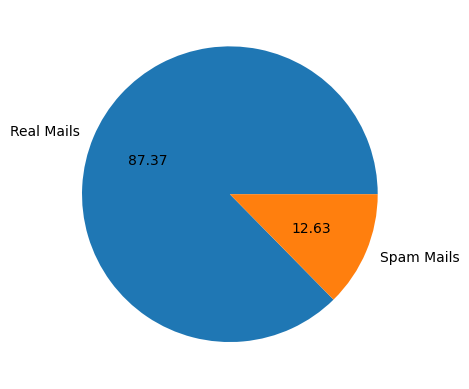

In [13]:
plt.pie(df["v1"].value_counts(),autopct = "%.2f",
        labels=['Real Mails','Spam Mails'])
plt.show()

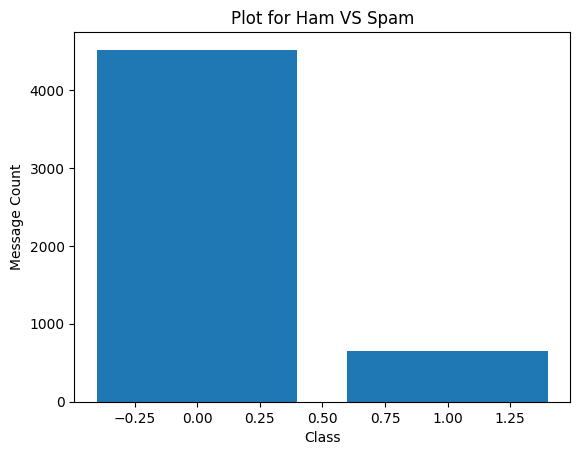

In [14]:
class_counts = df['v1'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Message Count')
plt.title('Plot for Ham VS Spam')
plt.show()

In [15]:
x = df['v2']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [16]:
y = df["v1"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=45)

In [18]:
vectzer = CountVectorizer()
vectzer.fit(x_train)
X_train_cv = vectzer.transform(x_train)
X_test_cv = vectzer.transform(x_test)

In [19]:
lreg = LogisticRegression()
lreg.fit(X_train_cv, y_train)

LogisticRegression()

In [20]:
y_pred = lreg.predict(X_test_cv)
print('Accuracy: {:.2f}'.format(lreg.score(X_test_cv, y_test)))

Accuracy: 0.98


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1359
           1       0.97      0.86      0.91       192

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("CALCULATIONS")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

CALCULATIONS
Accuracy: 0.9793681495809156
Precision: 0.9705882352941176
Recall: 0.859375
F1 score: 0.9116022099447514


In [23]:
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [24]:
custom_word = "Oasis Infobyte"
custom_word_vec = vectzer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'Oasis Infobyte' is predicted as: Ham


### Conclusion
We used Count Vectorizer and Logistic Regression Algorithms to train the model.
Finally, a model was built and predictions were computed using bespoke words utilizing the MultinomialNB Algorithm.